## Section 3 Neural Network Regression in TensorFlow
### ⚒️ Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try to building a neural network with 4 Dense layers and fitting it to your own regression dataset.
3. Try and improve the results we got on the insurance data set, some things you might want to include:
  - Building a larger model (how does one with 4 layers go?).
  - Increase the number of hidden units in each layer.
  - Lookup the documentation of [Adam]('https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam') and find out what the first parameter is. What happens if you increase it by x10?
  - What happens if you train for longer (say 300 epochs instead of 200)?
4. Import [Boston pricing dataset]('https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data') from TensorFlow `tf.keras.datasets`and model it.

### 🧮 Extracurricular:

* 🎬 [MIT introduction deep learning lecture 1]('https://youtu.be/njKP3FqW3Sk') - gives a great overview of what's happenig behind all the4 code we're running.
* 📑Reading: 1-hour of  [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice regressions models with TensorFlow, encourage to look through [Kaggle datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.




_______________________________________________________________________________________________________________________

## House Sales in King County, USA
### Predict house price using regression

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

License:
**CC0: Public Domain**

In [1]:
# Import libraries required
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.backends.backend_pdf import PdfPages



#### 1. 👁️👁️ Data Analysis OVERVIEW
The best way to start is to lookup the dataset to find what types of data contains, maybe, create some correlation map, and other tools to understand all the data.

Load the database to colab enviroment.

In [2]:
housingKC = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03_TF/ZTM_UDEMY/data/kc_house_data.csv')
housingKC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Let's analyze the infomation inside the csv.

In [3]:
housingKC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# As we can see this data has any null value, and except date column all the rest are numerical ones
# Good for neural networks.
# We need to convert date into a number. So I am going to create a new column with the value in int dtype
housingKC['n_date'] = pd.to_datetime(housingKC['date'], format='%Y%m%dT%H%M%S').astype(int)


In [5]:
housingKC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,n_date
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1413158400000000000
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1418083200000000000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1424822400000000000
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1418083200000000000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1424217600000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1400630400000000000
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1424649600000000000
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1403481600000000000
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1421366400000000000


In [6]:
housingKC.drop(['date'], axis=1, inplace=True)
housingKC

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,n_date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1413158400000000000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1418083200000000000
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1424822400000000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1418083200000000000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1424217600000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1400630400000000000
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1424649600000000000
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1403481600000000000
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1421366400000000000


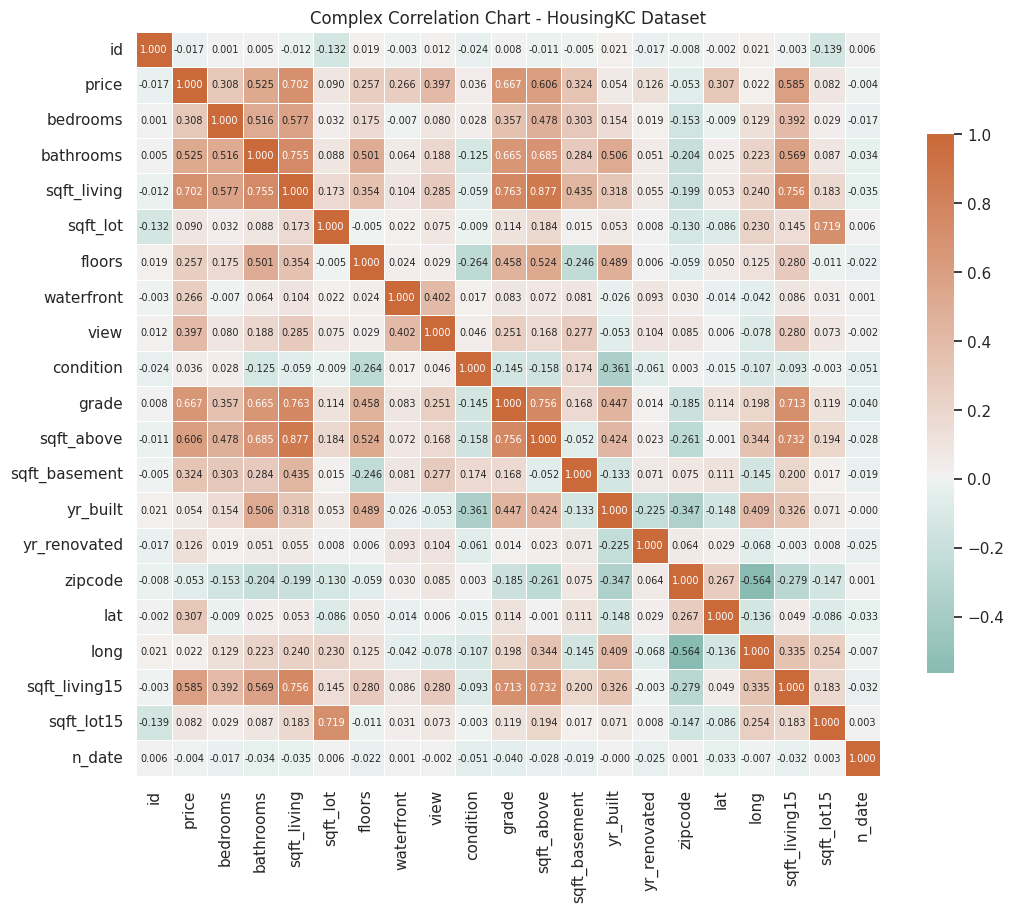

In [7]:
# Calculate the correlation matrix
correlation_matrix = housingKC.corr()

# Create a complex correlation chart using a heatmap
plt.figure(figsize=(12, 10))
sns.set(style="white")  # Set the style of the plot

# Generate a custom diverging colormap
cmap = sns.diverging_palette(173, 27, s=80, l=55, n=9, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},
            annot=True, fmt=".3f", annot_kws={"size": 7, "va": "center", "ha": "center"})

# Add title and show the plot
plt.title("Complex Correlation Chart - HousingKC Dataset")

# Configure matplotlib to export PDF with editable fonts
plt.rcParams['pdf.fonttype'] = 42

# Save the plot as a PDF vector format
plt.savefig("correlation_HousingKC_Chart.pdf", format="pdf")

# Show the plot
plt.show()

In [8]:
corr_HKC = housingKC.corr()
corr_HKC.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,n_date
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.005577
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.004357
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.016800
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.034410
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.034559


In [9]:
corr_HKC_price = corr_HKC['price'].sort_values(ascending=False)
corr_HKC_price


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
n_date          -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [10]:
print(housingKC['grade'])

0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64


💊💊💊 We can filter out all the features that has a correlation value under 0.2

It is needed that you are sure that the features you are filtering aren't necessary for training the model. (Experiment, experiment, experiment,...)

```
# Set the correlation threshold
correlation_threshold = 0.2  # Adjust this threshold based on your needs

# Find features with correlation above the threshold
relevant_features = corr_HCK_price[abs(corr_matrix['price']) > correlation_threshold].index.tolist()
```

For now we are going to use all the values with no filters

_________________________________________________________________________________________________

#### 👉👉 Normalization and Standarization

In this case we don´t need to apply One Hot Encoding to this dataset because all is `float` or `int` type

In [11]:
# List of columns to exclude from scaling
columns_to_exclude = ['id', 'price']

# Get the list of columns to scale (excluding the ones to exclude)
columns_to_scale = [col for col in housingKC.columns if col not in columns_to_exclude]

In [12]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), columns_to_scale)
)

# Create X & y values
X = housingKC.drop('price', axis=1)
y = housingKC['price']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and dataset with ct
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [13]:
X_train_normal

array([[0.45454545, 0.28125   , 0.1509434 , ..., 0.40457753, 0.04577244,
        0.92820513],
       [0.45454545, 0.25      , 0.13207547, ..., 0.2531406 , 0.00433129,
        0.51025641],
       [0.36363636, 0.25      , 0.15396226, ..., 0.29099983, 0.00507183,
        0.19487179],
       ...,
       [0.27272727, 0.34375   , 0.14535849, ..., 0.31268284, 0.03428298,
        0.65641026],
       [0.36363636, 0.40625   , 0.25283019, ..., 0.43039064, 0.05955817,
        0.26923077],
       [0.36363636, 0.4375    , 0.21886792, ..., 0.42006539, 0.00390563,
        0.88974359]])

Now that the X_train and X_test is normalized let's create the first model

In [14]:
# Define the random seed
tf.random.set_seed(37)

# 1. Create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

# 3. Fit the model
history = model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
541/541 [==============================] - 4s 4ms/step - loss: 513572.1250 - mae: 513572.1250
Epoch 2/200
541/541 [==============================] - 2s 3ms/step - loss: 226103.6875 - mae: 226103.6875
Epoch 3/200
541/541 [==============================] - 3s 5ms/step - loss: 183887.1875 - mae: 183887.1875
Epoch 4/200
541/541 [==============================] - 3s 6ms/step - loss: 178829.7031 - mae: 178829.7031
Epoch 5/200
541/541 [==============================] - 2s 4ms/step - loss: 173338.6094 - mae: 173338.6094
Epoch 6/200
541/541 [==============================] - 2s 4ms/step - loss: 167408.0312 - mae: 167408.0312
Epoch 7/200
541/541 [==============================] - 2s 4ms/step - loss: 160814.4844 - mae: 160814.4844
Epoch 8/200
541/541 [==============================] - 3s 5ms/step - loss: 153586.6406 - mae: 153586.6406
Epoch 9/200
541/541 [==============================] - 2s 4ms/step - loss: 146137.0938 - mae: 146137.0938
Epoch 10/200
541/541 [========================

In [15]:
eval1 = model.evaluate(X_test_normal, y_test)
eval1

136/136 [==============================] - 0s 2ms/step - loss: 119904.7344 - mae: 119904.7344


[119904.734375, 119904.734375]

In [16]:
y_train.median(), y_train.mean()

(450000.0, 539310.2458646616)

Text(0.5, 0, 'epochs')

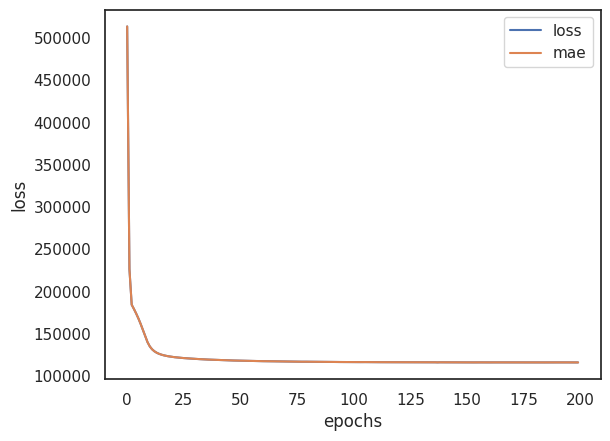

In [17]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [18]:
err_pct1 = (eval1[0] / y_train.median()) * 100
err_pct1

26.64549652777778

👁️ ** RESUME:** This model generates like a 27% interval of error.
Let`s build a new improved model.
Adding hidden layers to the 4 layers

In [19]:
# Define the random seed
tf.random.set_seed(37)

# 1. Create model
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics='mae')

# 3. Fit the model
history1 = model1.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
541/541 [==============================] - 3s 3ms/step - loss: 315603.0938 - mae: 315603.0938
Epoch 2/200
541/541 [==============================] - 1s 2ms/step - loss: 173309.6250 - mae: 173309.6250
Epoch 3/200
541/541 [==============================] - 1s 2ms/step - loss: 153130.8281 - mae: 153130.8281
Epoch 4/200
541/541 [==============================] - 1s 2ms/step - loss: 133863.0625 - mae: 133863.0625
Epoch 5/200
541/541 [==============================] - 1s 2ms/step - loss: 126418.7344 - mae: 126418.7344
Epoch 6/200
541/541 [==============================] - 1s 2ms/step - loss: 123597.1484 - mae: 123597.1484
Epoch 7/200
541/541 [==============================] - 1s 2ms/step - loss: 122121.6641 - mae: 122121.6641
Epoch 8/200
541/541 [==============================] - 1s 2ms/step - loss: 121209.8203 - mae: 121209.8203
Epoch 9/200
541/541 [==============================] - 1s 2ms/step - loss: 120481.8984 - mae: 120481.8984
Epoch 10/200
541/541 [========================

In [20]:
eval2 = model1.evaluate(X_test_normal, y_test)
eval2

136/136 [==============================] - 0s 2ms/step - loss: 119878.6953 - mae: 119878.6953


[119878.6953125, 119878.6953125]

Text(0.5, 0, 'epochs')

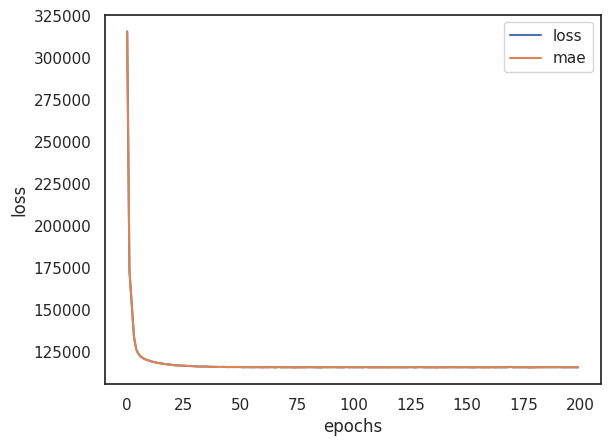

In [21]:
pd.DataFrame(history1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

We have increased hidden values for 4 layers and nothing interesting is happening. Looking at the graphic we had notice that there is no significant advance in using 200 epochs.
Let's try another model...

In [22]:
# Define the random seed
tf.random.set_seed(37)

# 1. Create model
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics='mae')

# 3. Fit the model
history2 = model2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
541/541 [==============================] - 2s 3ms/step - loss: 296075.4375 - mae: 296075.4375
Epoch 2/100
541/541 [==============================] - 1s 2ms/step - loss: 169698.0781 - mae: 169698.0781
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 147108.3438 - mae: 147108.3438
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 130958.6875 - mae: 130958.6875
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 125221.5625 - mae: 125221.5625
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 122824.8047 - mae: 122824.8047
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 121598.2500 - mae: 121598.2500
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 120728.6875 - mae: 120728.6875
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 120055.1094 - mae: 120055.1094
Epoch 10/100
541/541 [========================

In [23]:
eval3 = model2.evaluate(X_test_normal, y_test)
eval3

136/136 [==============================] - 0s 1ms/step - loss: 119982.5156 - mae: 119982.5156


[119982.515625, 119982.515625]

Text(0.5, 0, 'epochs')

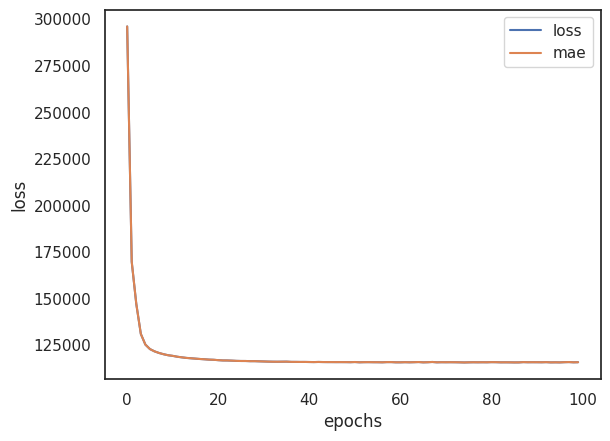

In [24]:
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## 🤔👉🤔 Maybe I am stupid!

This model is not improving with the recomendations of Udemy`s course. What I'm wrong at?<br> Are they explaining everything... sure not. Like all the courses...

### Another aproach

I am going to test a reduced model. Maybe if I get rid of the features with a correlation under `0.2` (respect `prize` the dependent variable I want the model to predict it'ss value).

Can I build a better and stronger model with this operation?

I don't know who to ask, so I am going to try...

In [40]:
housingKC

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,n_date
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1413158400000000000
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1418083200000000000
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1424822400000000000
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1418083200000000000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1424217600000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1400630400000000000
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1424649600000000000
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1403481600000000000
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1421366400000000000


In [41]:
# Let´s get rid of the values of housingKC that correlates to 'prize' under 0.2
# Set the correlation threshold
correlation_threshold = 0.2  # Adjust this threshold based on your needs
relevant_HKC = corr_HKC[abs(corr_HKC['price']) > correlation_threshold].index.tolist()
relevant_HKC.pop(0)
relevant_HKC

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15']

In [42]:
# Now drop items of this list out of the dataset
housingKC_small = housingKC.drop(relevant_HKC, axis=1)
housingKC_small

,id,price,sqft_lot,condition,yr_built,yr_renovated,zipcode,long,sqft_lot15,n_date
0,7129300520,221900.0,5650,3,1955,0,98178,-122.257,5650,1413158400000000000
1,6414100192,538000.0,7242,3,1951,1991,98125,-122.319,7639,1418083200000000000
2,5631500400,180000.0,10000,3,1933,0,98028,-122.233,8062,1424822400000000000
3,2487200875,604000.0,5000,5,1965,0,98136,-122.393,5000,1418083200000000000
4,1954400510,510000.0,8080,3,1987,0,98074,-122.045,7503,1424217600000000000
...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,1131,3,2009,0,98103,-122.346,1509,1400630400000000000
21609,6600060120,400000.0,5813,3,2014,0,98146,-122.362,7200,1424649600000000000
21610,1523300141,402101.0,1350,3,2009,0,98144,-122.299,2007,1403481600000000000
21611,291310100,400000.0,2388,3,2004,0,98027,-122.069,1287,1421366400000000000


In [43]:
# List of columns to exclude from scaling
columns_to_exclude = ['id', 'price']

# Get the list of columns to scale (excluding the ones to exclude)
columns_to_scale = [col for col in housingKC_small.columns if col not in columns_to_exclude]

In [44]:
# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), columns_to_scale)
)

# Create X & y values
X = housingKC_small.drop('price', axis=1)
y = housingKC_small['price']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and dataset with ct
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
b_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
])

# 2. Compile it
b_model.compile(loss=['mae'],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='mae')

# 3. Fit the model
b_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
541/541 [==============================] - 4s 4ms/step - loss: 233749.8594 - mae: 233749.8594
Epoch 2/100
541/541 [==============================] - 2s 3ms/step - loss: 219494.2812 - mae: 219494.2812
Epoch 3/100
541/541 [==============================] - 1s 2ms/step - loss: 219707.3281 - mae: 219707.3281
Epoch 4/100
541/541 [==============================] - 1s 2ms/step - loss: 220182.4062 - mae: 220182.4062
Epoch 5/100
541/541 [==============================] - 1s 2ms/step - loss: 219865.5000 - mae: 219865.5000
Epoch 6/100
541/541 [==============================] - 1s 2ms/step - loss: 219361.8906 - mae: 219361.8906
Epoch 7/100
541/541 [==============================] - 1s 2ms/step - loss: 220611.9844 - mae: 220611.9844
Epoch 8/100
541/541 [==============================] - 1s 2ms/step - loss: 219770.1094 - mae: 219770.1094
Epoch 9/100
541/541 [==============================] - 1s 2ms/step - loss: 219694.1094 - mae: 219694.1094
Epoch 10/100
541/541 [========================

In [46]:
b_model.evaluate(X_test_normal, y_test)

136/136 [==============================] - 2s 7ms/step - loss: 226189.6250 - mae: 226189.6250


[226189.625, 226189.625]

## 🤬🤬🤬🤬 Fail, fail, fail

If anyone is reading this.....
I don't know what the f... is happening.
I'll come back in a few days and see if I can build a proper prediction model using TensorFlow.
<br>¿BAM?